# 0.0 Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.display import Image
from IPython.core.display import HTML

import scipy
from scipy import stats

#Biblioteca pingouin
import pingouin as pg

import sklearn
from sklearn.linear_model import LinearRegression
#from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import jarque_bera
from statsmodels.formula.api import ols

from plotly import express as px
import plotly.graph_objects as go

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## 0.1 Helper Functions

In [2]:
#ajusta graficos
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
#Retirar notação cientifica
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
#Retirar notação cientifica
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [5]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.rc('axes' ,labelsize=18)

# Exemplo 9.1

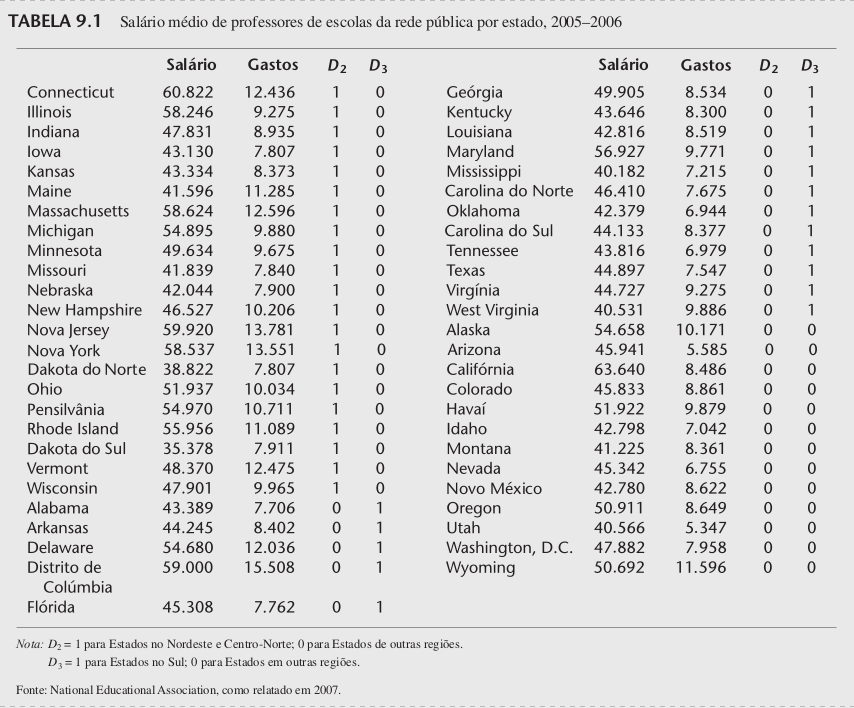

In [6]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_09_tabela_9.1.png')

In [7]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_9.1.xlsx')
data.head()

estado  salario  gastos  d2  d3
0  Connecticut    60822   12436   1   0
1     Illinois    58246    9275   1   0
2      Indiana    47831    8935   1   0
3         lowa    43130    7807   1   0
4       Kansas    43334    8373   1   0

## Regressão

In [8]:
#biblioteca Pingouin
modelo = pg.linear_regression(data[['d2', 'd3']], data['salario'])
modelo

names       coef        se       T   pval     r2  adj_r2   CI[2.5%]  CI[97.5%]
0  Intercept 48014.6154 1857.2037 25.8532 0.0000 0.0440  0.0041 44280.4572 51748.7736
1         d2  1524.0989 2363.1394  0.6449 0.5220 0.0440  0.0041 -3227.3113  6275.5091
2         d3 -1721.0271 2467.1508 -0.6976 0.4888 0.0440  0.0041 -6681.5663  3239.5120

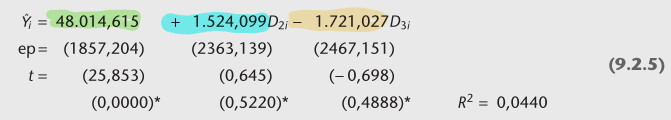

In [9]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_09_exemplo_9.1_1.png')

In [10]:
# residuos do modelo
modelo.residuals_

array([ 11283.28571429,   8707.28571429,  -1707.71428571,  -6408.71428571,
        -6204.71428571,  -7942.71428571,   9085.28571429,   5356.28571429,
           95.28571429,  -7699.71428571,  -7494.71428571,  -3011.71428571,
        10381.28571429,   8998.28571429, -10716.71428571,   2398.28571429,
         5431.28571429,   6417.28571429, -14160.71428571,  -1168.71428571,
        -1637.71428571,  -2904.58823529,  -2048.58823529,   8386.41176471,
        12706.41176471,   -985.58823529,   3611.41176471,  -2647.58823529,
        -3477.58823529,  10633.41176471,  -6111.58823529,    116.41176471,
        -3914.58823529,  -2160.58823529,  -2477.58823529,  -1396.58823529,
        -1566.58823529,  -5762.58823529,   6643.38461538,  -2073.61538462,
        15625.38461538,  -2181.61538462,   3907.38461538,  -5216.61538462,
        -6789.61538462,  -2672.61538462,  -5234.61538462,   2896.38461538,
        -7448.61538462,   -132.61538462,   2677.38461538])

In [11]:
np.sum(modelo.residuals_)

3.128661774098873e-10

## Regressão com d1 e com intercepto

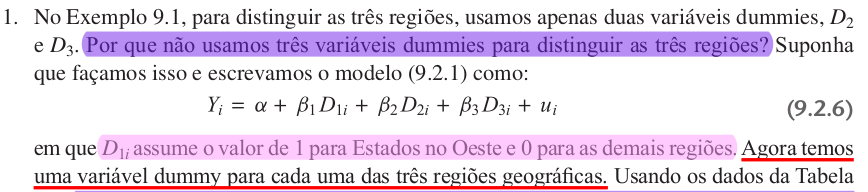

In [12]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_09_exemplo_9.1_2.png')

In [13]:
data['d1'] = data.apply( lambda x: 1 if ( x['d2']==0) & (x['d3']==0) else 0, axis = 1)
data

estado  salario  gastos  d2  d3  d1
0            Connecticut    60822   12436   1   0   0
1               Illinois    58246    9275   1   0   0
2                Indiana    47831    8935   1   0   0
3                   lowa    43130    7807   1   0   0
4                 Kansas    43334    8373   1   0   0
5                  Maine    41596   11285   1   0   0
6          Massachusetts    58624   12596   1   0   0
7               Michigan    54895    9880   1   0   0
8              Minnesota    49634    9675   1   0   0
9               Missouri    41839    7840   1   0   0
10              Nebraska    42044    7900   1   0   0
11         New Hampshire    46527   10206   1   0   0
12           Nova Jersey    59920   13781   1   0   0
13             Nova York    58537   13551   1   0   0
14       Dakota do Norte    38822    7807   1   0   0
15                  Ohio    51937   10034   1   0   0
16           Pensilvânia    54970   10711   1   0   0
17          Rhode Island    55956   11089   1   0   0
18         Dakota do Sul    35378    7911   1   0   0
19               Vermont    48370   12475   1   0   0
20             Wisconsin    47901    9965   1   0   0
21               Alabama    43389    7706   0   1   0
22              Arkansas    44245    8402   0   1   0
23              Delaware    54680   12036   0   1   0
24  Distrito de Colúmbia    59000   15508   0   1   0
25               Flórida    45308    7762   0   1   0
26               Geórgia    49905    8534   0   1   0
27              Kentucky    43646    8300   0   1   0
28             Louisiana    42816    8519   0   1   0
29              Maryland    56927    9771   0   1   0
30           Mississippi    40182    7215   0   1   0
31     Carolina do Norte    46410    7675   0   1   0
32              Oklahoma    42379    6944   0   1   0
33       Carolina do Sul    44133    8377   0   1   0
34             Tennessee    43816    6979   0   1   0
35                 Texas    44897    7547   0   1   0
36              Virgínia    44727    9275   0   1   0
37         West Virgínia    40531    9886   0   1   0
38                Alaska    54658   10171   0   0   1
39               Arizona    45941    5585   0   0   1
40            Califórnia    63640    8486   0   0   1
41              Colorado    45833    8861   0   0   1
42                 Havaí    51922    9879   0   0   1
43                 Idaho    42798    7042   0   0   1
44               Montana    41225    8361   0   0   1
45                Nevada    45342    6755   0   0   1
46           Novo México    42780    8622   0   0   1
47                Oregon    50911    8649   0   0   1
48                  Utah    40566    5347   0   0   1
49      Washington. D.C.    47882    7958   0   0   1
50               Wyoming    50692   11596   0   0   1

In [14]:
#statsmodels
x = data[['d1','d2', 'd3']]
y = data['salario']
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.104
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.340
Time:                        20:10:07   Log-Likelihood:                -520.09
No. Observations:                  51   AIC:                             1046.
Df Residuals:                      48   BIC:                             1052.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.596e+04    716.853     50.166      0.0

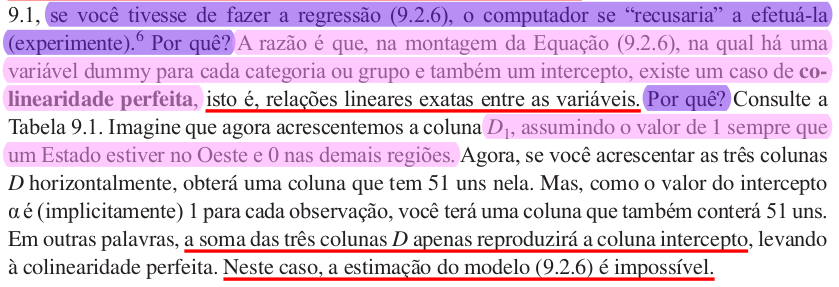

In [15]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_09_exemplo_9.1_3.png')

## Regressão com d1 sem intercepto

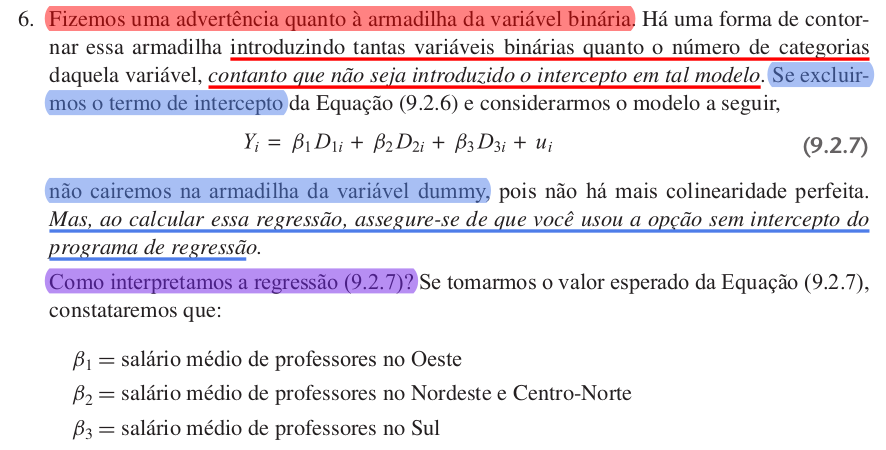

In [16]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_09_exemplo_9.1_4.png')

In [17]:
#statsmodels
x = data[['d1','d2', 'd3']]
y = data['salario']
#x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.104
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.340
Time:                        20:10:07   Log-Likelihood:                -520.09
No. Observations:                  51   AIC:                             1046.
Df Residuals:                      48   BIC:                             1052.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
d1          4.801e+04   1857.204     25.853      0.0

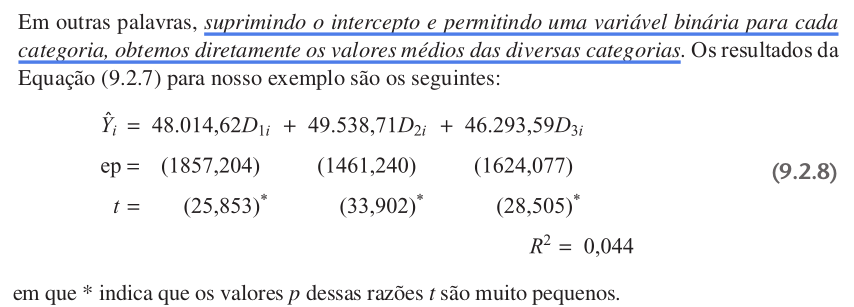

In [18]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_09_exemplo_9.1_5.png')

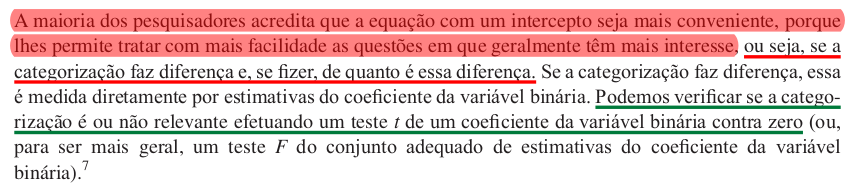

In [19]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_09_exemplo_9.1_6.png')

In [20]:
# soma dos residuos do modelo
model.resid

0     11283.2857
1      8707.2857
2     -1707.7143
3     -6408.7143
4     -6204.7143
5     -7942.7143
6      9085.2857
7      5356.2857
8        95.2857
9     -7699.7143
10    -7494.7143
11    -3011.7143
12    10381.2857
13     8998.2857
14   -10716.7143
15     2398.2857
16     5431.2857
17     6417.2857
18   -14160.7143
19    -1168.7143
20    -1637.7143
21    -2904.5882
22    -2048.5882
23     8386.4118
24    12706.4118
25     -985.5882
26     3611.4118
27    -2647.5882
28    -3477.5882
29    10633.4118
30    -6111.5882
31      116.4118
32    -3914.5882
33    -2160.5882
34    -2477.5882
35    -1396.5882
36    -1566.5882
37    -5762.5882
38     6643.3846
39    -2073.6154
40    15625.3846
41    -2181.6154
42     3907.3846
43    -5216.6154
44    -6789.6154
45    -2672.6154
46    -5234.6154
47     2896.3846
48    -7448.6154
49     -132.6154
50     2677.3846
dtype: float64

In [21]:
np.sum(model.resid)

2.473825588822365e-10

# Exemplo 9.3 Inserindo gastos Estaduais com os alunos

In [22]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_9.1.xlsx')
data.head()

estado  salario  gastos  d2  d3
0  Connecticut    60822   12436   1   0
1     Illinois    58246    9275   1   0
2      Indiana    47831    8935   1   0
3         lowa    43130    7807   1   0
4       Kansas    43334    8373   1   0

In [23]:
#statsmodels
x = data[['gastos','d2', 'd3']]
y = data['salario']
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     15.52
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           3.76e-07
Time:                        20:10:07   Log-Likelihood:                -503.68
No. Observations:                  51   AIC:                             1015.
Df Residuals:                      47   BIC:                             1023.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.869e+04   3262.521      8.795      0.0

# Exemplo 9.4

In [24]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_9.2.xlsx')

In [25]:
data.head()

observacao  poupanca     renda  dummy
0        1970   61.0000  727.1000      0
1        1971   68.6000  790.2000      0
2        1972   63.6000  855.3000      0
3        1973   89.6000  965.0000      0
4        1974   97.6000 1054.2000      0

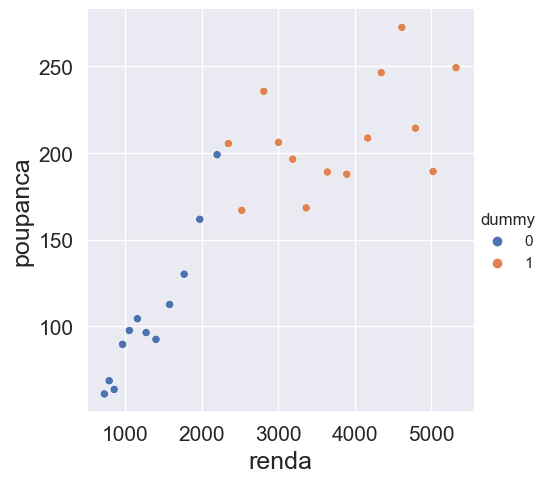

In [26]:
sns.relplot(data = data, x = 'renda',y = 'poupanca', hue = 'dummy')

In [27]:
fig = px.scatter_3d( data, x='renda', y='dummy', z='poupanca', color='dummy')
fig.show()

In [28]:
print('ponto médio poupanca y = {}'.format(data['poupanca'].mean() ) )
print('ponto médio renda (x1) = {}'.format( data['renda'].mean() ) )
print('ponto médio dummy (d1) = {}'.format(data['dummy'].mean() ) )

ponto médio poupanca y = 162.08846153846156
ponto médio renda (x1) = 2645.1192307692304
ponto médio dummy (d1) = 0.5384615384615384


In [29]:
#statsmodels
x = data[['renda','dummy']]
y = data['poupanca']
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               poupanca   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     43.76
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           1.45e-08
Time:                        20:10:10   Log-Likelihood:                -123.78
No. Observations:                  26   AIC:                             253.6
Df Residuals:                      23   BIC:                             257.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.7059     13.546      5.294      0.0

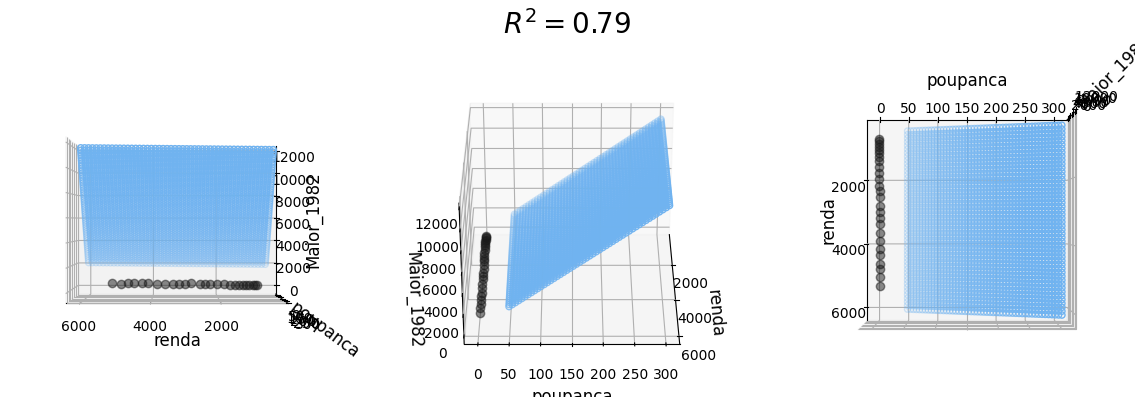

In [30]:
X = data[['renda', 'dummy']].values.reshape(-1,2)
Y = data['poupanca']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(500, 6000, 50)   # range of porosity values
y_pred = np.linspace(50, 300, 50)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('renda', fontsize=12)
    ax.set_ylabel('poupanca', fontsize=12)
    ax.set_zlabel('Maior_1982', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=0, azim=90)
ax2.view_init(elev=30, azim=0)
ax3.view_init(elev=90, azim=0)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [31]:
print("Coeficiente:    ", ols.coef_[0])
print("Intercepto:", ols.intercept_)

Coeficiente:     0.026467889004329198
Intercepto: 71.70587083461018


In [32]:
fig = px.scatter_3d( data, x='renda', y='dummy', z='poupanca', color='dummy', color_continuous_midpoint=0.53)
fig.show()

## Exemplo 9.6 

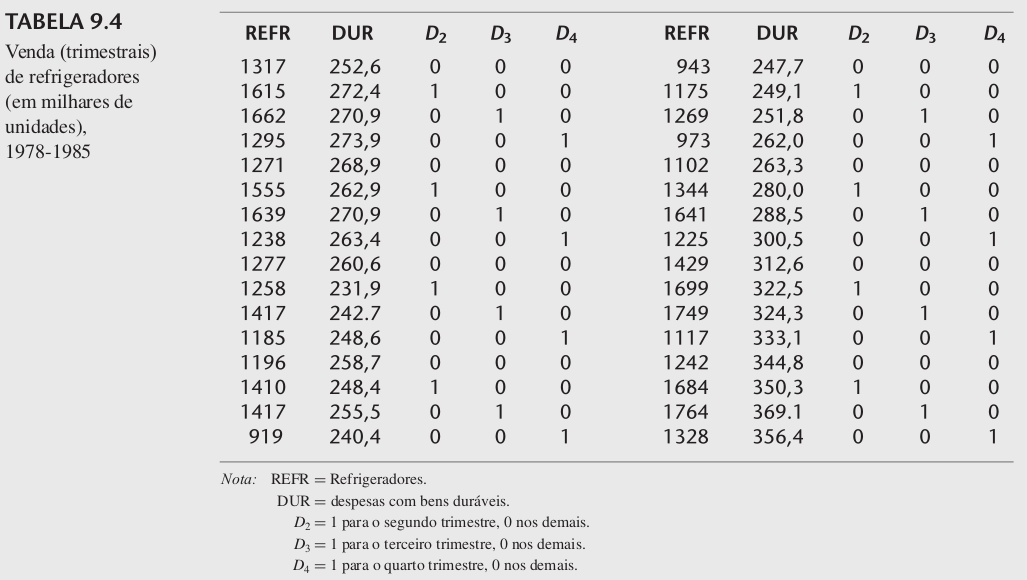

In [33]:
Image('./imagens/cap_09_tabela_9.4.png')

In [34]:
data = pd.read_excel('./datasets/tabela_9.4.xlsx')
data

ano  trimestre  refr      dur  d2  d3  d4
0   1978_1          1  1317 252.6000   0   0   0
1   1978_2          2  1615 272.4000   1   0   0
2   1978_3          3  1662 270.9000   0   1   0
3   1978_4          4  1295 273.9000   0   0   1
4   1979_1          1  1271 268.9000   0   0   0
5   1979_2          2  1555 262.9000   1   0   0
6   1979_3          3  1639 270.9000   0   1   0
7   1979_4          4  1238 263.4000   0   0   1
8   1980_1          1  1277 260.6000   0   0   0
9   1980_2          2  1258 231.9000   1   0   0
10  1980_3          3  1417 242.7000   0   1   0
11  1980_4          4  1185 248.6000   0   0   1
12  1981_1          1  1196 258.7000   0   0   0
13  1981_2          2  1410 248.4000   1   0   0
14  1981_3          3  1417 255.5000   0   1   0
15  1981_4          4   919 240.4000   0   0   1
16  1982_1          1   943 247.7000   0   0   0
17  1982_2          2  1175 249.1000   1   0   0
18  1982_3          3  1269 251.8000   0   1   0
19  1982_4          4   973 262.0000   0   0   1
20  1983_1          1  1102 263.3000   0   0   0
21  1983_2          2  1344 280.0000   1   0   0
22  1983_3          3  1641 288.5000   0   1   0
23  1983_4          4  1225 300.5000   0   0   1
24  1984_1          1  1429 312.6000   0   0   0
25  1984_2          2  1699 322.5000   1   0   0
26  1984_3          3  1749 324.3000   0   1   0
27  1984_4          4  1117 333.1000   0   0   1
28  1985_1          1  1242 344.8000   0   0   0
29  1985_2          2  1684 350.3000   1   0   0
30  1985_3          3  1764 369.1000   0   1   0
31  1985_4          4  1328 356.4000   0   0   1

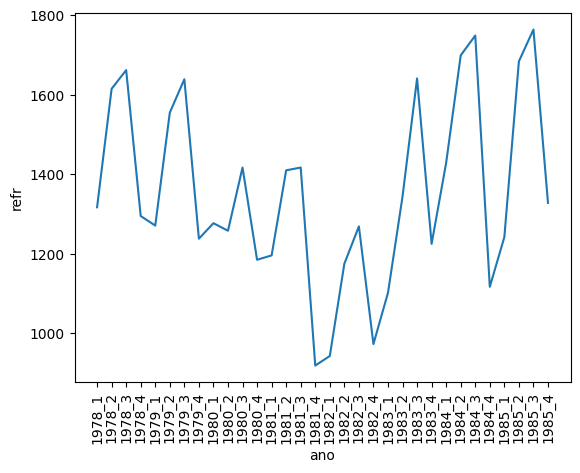

In [35]:
sns.lineplot(data = data, x= 'ano',y = 'refr');
plt.xticks(rotation = 90);

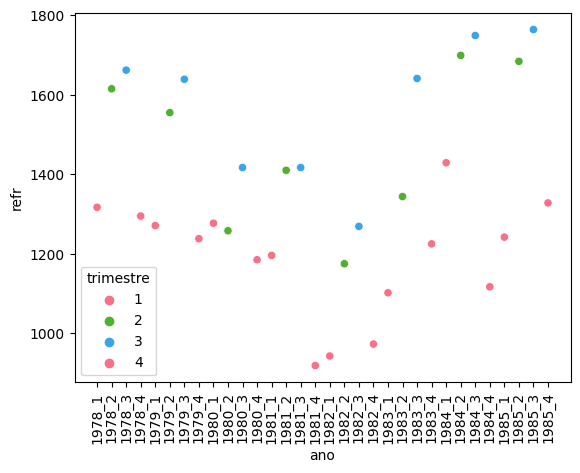

In [36]:
sns.scatterplot(data = data, x= 'ano',y = 'refr', hue = 'trimestre', palette = "husl");
plt.xticks(rotation = 90);

### Modelo sem intercepto

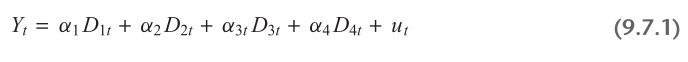

In [37]:
Image('./imagens/cap_09_exemplo_9.6_1.png')

In [38]:
data['d1'] = data.apply( lambda x: 1 if ( x['d2']==0) & (x['d3']==0) & ( x['d4']==0) else 0, axis = 1)
data.head()

ano  trimestre  refr      dur  d2  d3  d4  d1
0  1978_1          1  1317 252.6000   0   0   0   1
1  1978_2          2  1615 272.4000   1   0   0   0
2  1978_3          3  1662 270.9000   0   1   0   0
3  1978_4          4  1295 273.9000   0   0   1   0
4  1979_1          1  1271 268.9000   0   0   0   1

In [39]:
#statsmodels
x = data[['d1','d2','d3', 'd4']]
y = data['refr']
#x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   refr   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     10.60
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           7.91e-05
Time:                        20:10:18   Log-Likelihood:                -207.55
No. Observations:                  32   AIC:                             423.1
Df Residuals:                      28   BIC:                             429.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
d1          1222.1250     59.990     20.372      0.0

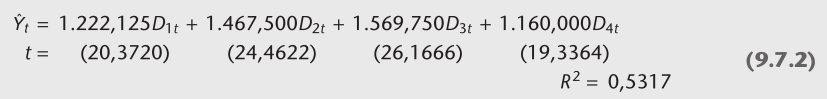

In [40]:
Image('./imagens/cap_09_exemplo_9.6_2.png')

### Modelo com intercepto

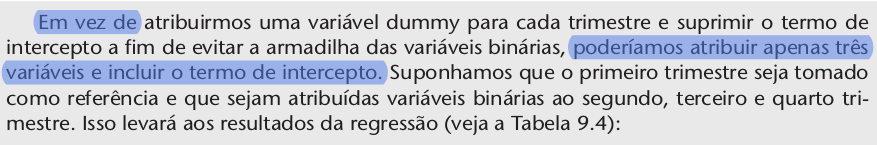

In [41]:
Image('./imagens/cap_09_exemplo_9.6_4.png')

In [42]:
data[['refr','trimestre','d2','d3','d4']].head(8)

refr  trimestre  d2  d3  d4
0  1317          1   0   0   0
1  1615          2   1   0   0
2  1662          3   0   1   0
3  1295          4   0   0   1
4  1271          1   0   0   0
5  1555          2   1   0   0
6  1639          3   0   1   0
7  1238          4   0   0   1

In [43]:
x = data[['d2','d3','d4']]
y = data['refr']
x = sm.add_constant(x) 
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   refr   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     10.60
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           7.91e-05
Time:                        20:10:18   Log-Likelihood:                -207.55
No. Observations:                  32   AIC:                             423.1
Df Residuals:                      28   BIC:                             429.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1222.1250     59.990     20.372      0.0

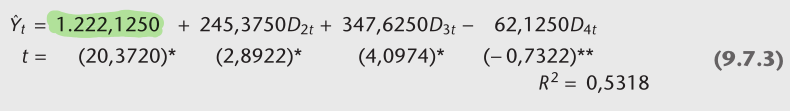

In [44]:
Image('./imagens/cap_09_exemplo_9.6_3.png')

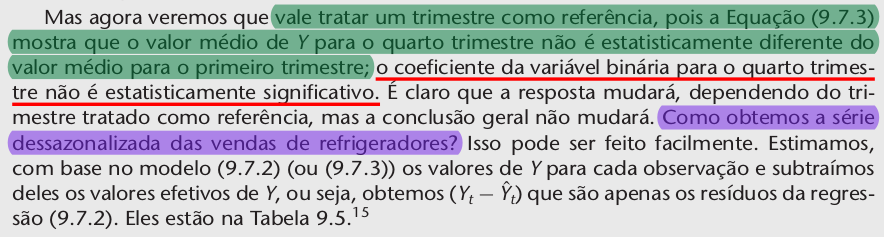

In [45]:
Image('./imagens/cap_09_exemplo_9.6_5.png')

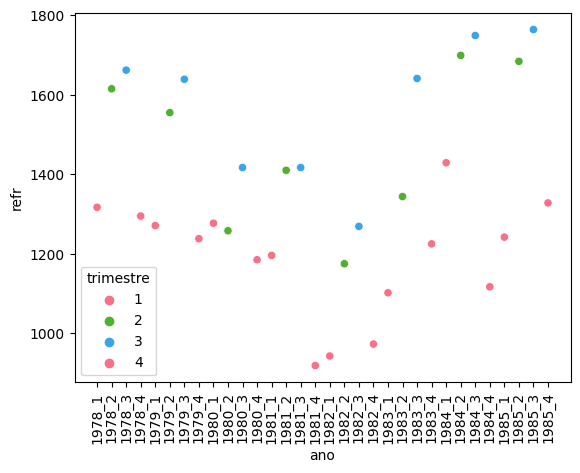

In [46]:
sns.scatterplot(data = data, x= 'ano',y = 'refr', hue = 'trimestre', palette = "husl");
plt.xticks(rotation = 90);

In [47]:
data['prediction'] = model.predict(x)
data['desvio'] = model.resid
data[['ano','refr','prediction','desvio']]

ano  refr  prediction    desvio
0   1978_1  1317   1222.1250   94.8750
1   1978_2  1615   1467.5000  147.5000
2   1978_3  1662   1569.7500   92.2500
3   1978_4  1295   1160.0000  135.0000
4   1979_1  1271   1222.1250   48.8750
5   1979_2  1555   1467.5000   87.5000
6   1979_3  1639   1569.7500   69.2500
7   1979_4  1238   1160.0000   78.0000
8   1980_1  1277   1222.1250   54.8750
9   1980_2  1258   1467.5000 -209.5000
10  1980_3  1417   1569.7500 -152.7500
11  1980_4  1185   1160.0000   25.0000
12  1981_1  1196   1222.1250  -26.1250
13  1981_2  1410   1467.5000  -57.5000
14  1981_3  1417   1569.7500 -152.7500
15  1981_4   919   1160.0000 -241.0000
16  1982_1   943   1222.1250 -279.1250
17  1982_2  1175   1467.5000 -292.5000
18  1982_3  1269   1569.7500 -300.7500
19  1982_4   973   1160.0000 -187.0000
20  1983_1  1102   1222.1250 -120.1250
21  1983_2  1344   1467.5000 -123.5000
22  1983_3  1641   1569.7500   71.2500
23  1983_4  1225   1160.0000   65.0000
24  1984_1  1429   1222.1250  206.8750
25  1984_2  1699   1467.5000  231.5000
26  1984_3  1749   1569.7500  179.2500
27  1984_4  1117   1160.0000  -43.0000
28  1985_1  1242   1222.1250   19.8750
29  1985_2  1684   1467.5000  216.5000
30  1985_3  1764   1569.7500  194.2500
31  1985_4  1328   1160.0000  168.0000

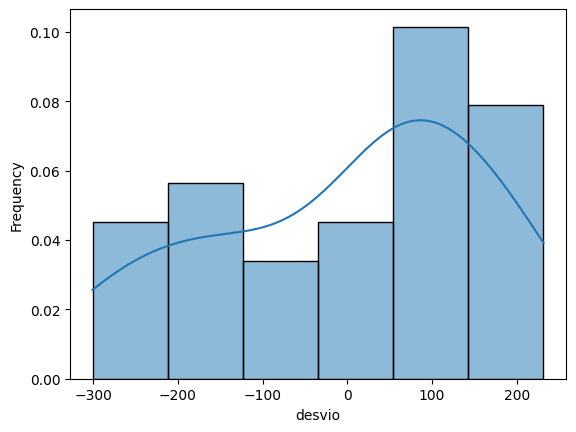

In [48]:
# histograma dos residuos
sns.histplot(data = data, x = 'desvio', stat = 'frequency', kde = True);

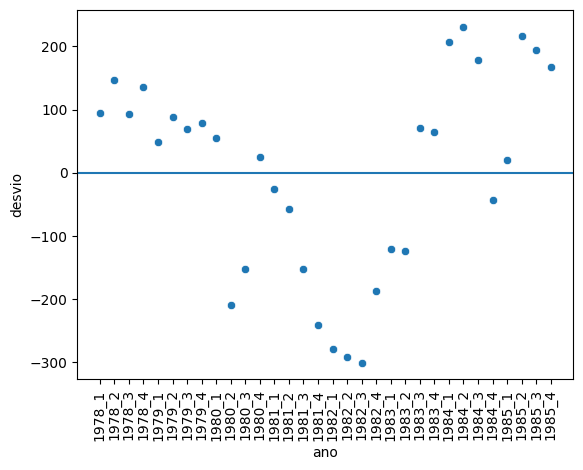

In [49]:
# dispersao dos residuos
sns.scatterplot( data = data, x = 'ano', y = 'desvio');
plt.axhline(y = 0);
plt.xticks(rotation = 90);

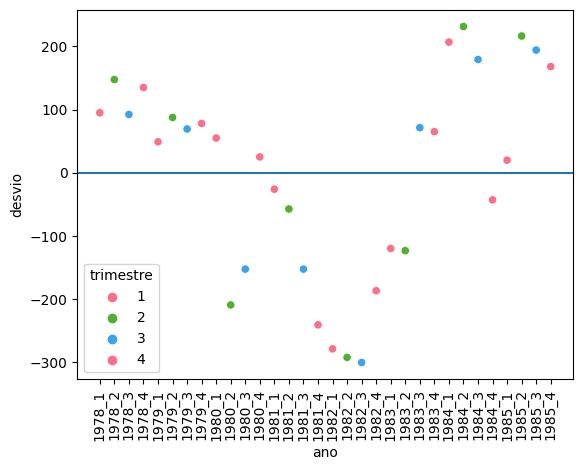

In [50]:
# dispersao dos residuos
sns.scatterplot( data = data, x = 'ano', y = 'desvio',hue = 'trimestre', palette = "husl");
plt.axhline(y = 0);
plt.xticks(rotation = 90);

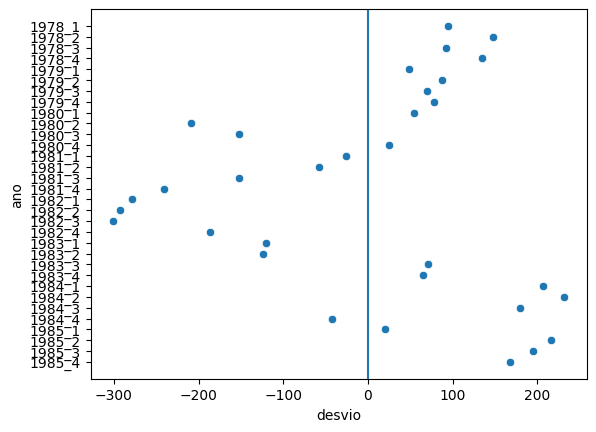

In [51]:
# dispersao dos residuos
sns.scatterplot( data = data, x ='desvio' , y = 'ano');
plt.axvline(x = 0);

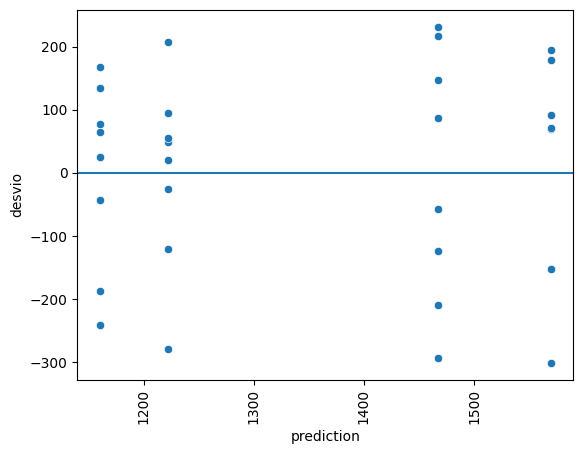

In [52]:
# dispersao dos residuos
sns.scatterplot( data = data, x = 'prediction', y = 'desvio');
plt.axhline(y = 0);
plt.xticks(rotation = 90);

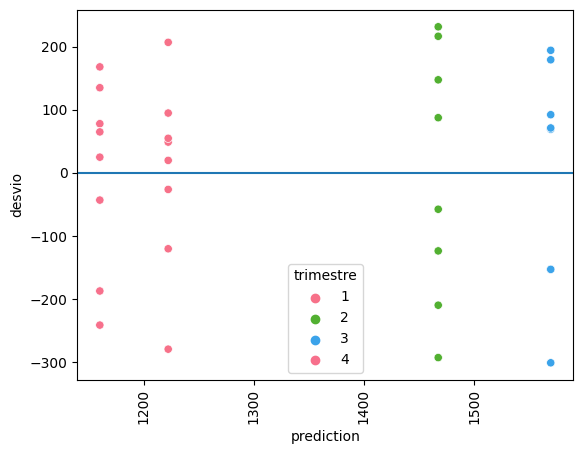

In [53]:
# dispersao dos residuos
sns.scatterplot( data = data, x = 'prediction', y = 'desvio',hue = 'trimestre', palette = "husl");
plt.axhline(y = 0);
plt.xticks(rotation = 90);

### Modelo com intercepto e variável gastos com bens duráveis

In [54]:
data = pd.read_excel('./datasets/tabela_9.4.xlsx')
data

ano  trimestre  refr      dur  d2  d3  d4
0   1978_1          1  1317 252.6000   0   0   0
1   1978_2          2  1615 272.4000   1   0   0
2   1978_3          3  1662 270.9000   0   1   0
3   1978_4          4  1295 273.9000   0   0   1
4   1979_1          1  1271 268.9000   0   0   0
5   1979_2          2  1555 262.9000   1   0   0
6   1979_3          3  1639 270.9000   0   1   0
7   1979_4          4  1238 263.4000   0   0   1
8   1980_1          1  1277 260.6000   0   0   0
9   1980_2          2  1258 231.9000   1   0   0
10  1980_3          3  1417 242.7000   0   1   0
11  1980_4          4  1185 248.6000   0   0   1
12  1981_1          1  1196 258.7000   0   0   0
13  1981_2          2  1410 248.4000   1   0   0
14  1981_3          3  1417 255.5000   0   1   0
15  1981_4          4   919 240.4000   0   0   1
16  1982_1          1   943 247.7000   0   0   0
17  1982_2          2  1175 249.1000   1   0   0
18  1982_3          3  1269 251.8000   0   1   0
19  1982_4          4   973 262.0000   0   0   1
20  1983_1          1  1102 263.3000   0   0   0
21  1983_2          2  1344 280.0000   1   0   0
22  1983_3          3  1641 288.5000   0   1   0
23  1983_4          4  1225 300.5000   0   0   1
24  1984_1          1  1429 312.6000   0   0   0
25  1984_2          2  1699 322.5000   1   0   0
26  1984_3          3  1749 324.3000   0   1   0
27  1984_4          4  1117 333.1000   0   0   1
28  1985_1          1  1242 344.8000   0   0   0
29  1985_2          2  1684 350.3000   1   0   0
30  1985_3          3  1764 369.1000   0   1   0
31  1985_4          4  1328 356.4000   0   0   1

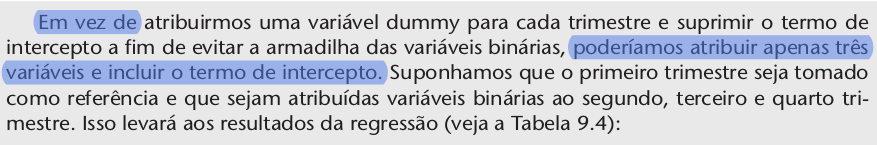

In [55]:
Image('./imagens/cap_09_exemplo_9.6_4.png')

In [56]:
data.head()

ano  trimestre  refr      dur  d2  d3  d4
0  1978_1          1  1317 252.6000   0   0   0
1  1978_2          2  1615 272.4000   1   0   0
2  1978_3          3  1662 270.9000   0   1   0
3  1978_4          4  1295 273.9000   0   0   1
4  1979_1          1  1271 268.9000   0   0   0

In [57]:
x = data[['d2','d3','d4','dur']]
y = data['refr']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   refr   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     18.24
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           2.30e-07
Time:                        20:10:26   Log-Likelihood:                -198.75
No. Observations:                  32   AIC:                             407.5
Df Residuals:                      27   BIC:                             414.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        456.2440    178.265      2.559      0.0

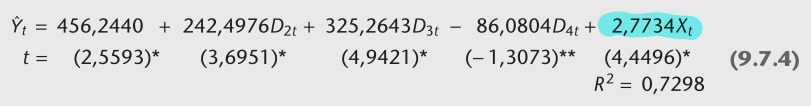

In [58]:
Image('./imagens/cap_09_exemplo_9.6_6.png')

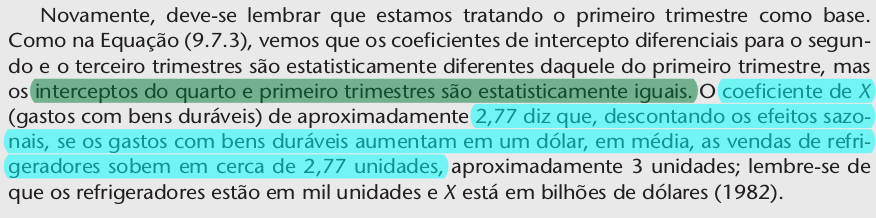

In [59]:
Image('./imagens/cap_09_exemplo_9.6_7.png')

## Sazonalidade dos gastos com bens duráveis - Teorema de Frisch-Waugh

In [60]:
data = pd.read_excel('./datasets/tabela_9.4.xlsx')
data.head()

ano  trimestre  refr      dur  d2  d3  d4
0  1978_1          1  1317 252.6000   0   0   0
1  1978_2          2  1615 272.4000   1   0   0
2  1978_3          3  1662 270.9000   0   1   0
3  1978_4          4  1295 273.9000   0   0   1
4  1979_1          1  1271 268.9000   0   0   0

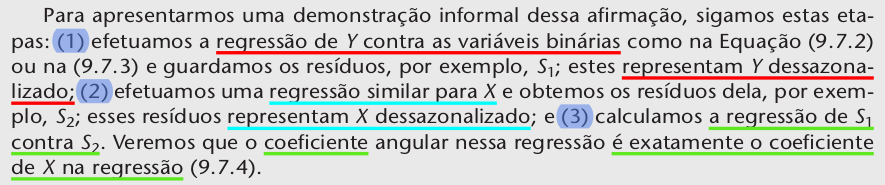

In [61]:
Image('./imagens/cap_09_exemplo_9.6_9.png')

### Regressão de y contra variáveis binárias

In [62]:
x = data[['d2','d3','d4']]
y = data['refr']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   refr   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     10.60
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           7.91e-05
Time:                        20:10:26   Log-Likelihood:                -207.55
No. Observations:                  32   AIC:                             423.1
Df Residuals:                      28   BIC:                             429.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1222.1250     59.990     20.372      0.0

In [63]:
data['s1'] = model.resid
data.head()

ano  trimestre  refr      dur  d2  d3  d4       s1
0  1978_1          1  1317 252.6000   0   0   0  94.8750
1  1978_2          2  1615 272.4000   1   0   0 147.5000
2  1978_3          3  1662 270.9000   0   1   0  92.2500
3  1978_4          4  1295 273.9000   0   0   1 135.0000
4  1979_1          1  1271 268.9000   0   0   0  48.8750

### Regressão de X contra variáveis binárias

In [64]:
x = data[['d2','d3','d4']]
y = data['dur']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    dur   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.095
Method:                 Least Squares   F-statistic:                    0.1045
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.957
Time:                        20:10:26   Log-Likelihood:                -161.15
No. Observations:                  32   AIC:                             330.3
Df Residuals:                      28   BIC:                             336.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        276.1500     14.069     19.628      0.0

In [65]:
data['s2'] = model.resid
data.head()

ano  trimestre  refr      dur  d2  d3  d4       s1       s2
0  1978_1          1  1317 252.6000   0   0   0  94.8750 -23.5500
1  1978_2          2  1615 272.4000   1   0   0 147.5000  -4.7875
2  1978_3          3  1662 270.9000   0   1   0  92.2500 -13.3125
3  1978_4          4  1295 273.9000   0   0   1 135.0000 -10.8875
4  1979_1          1  1271 268.9000   0   0   0  48.8750  -7.2500

### Regressão S1 contra S2

In [66]:
x = data[['s2']]
y = data['s1']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     s1   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     22.00
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           5.58e-05
Time:                        20:10:26   Log-Likelihood:                -198.75
No. Observations:                  32   AIC:                             401.5
Df Residuals:                      30   BIC:                             404.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.862e-14     22.011  -2.66e-15      1.0

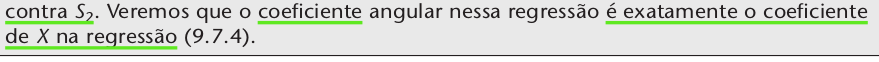

In [67]:
Image('./imagens/cap_09_exemplo_9.6_10.png')

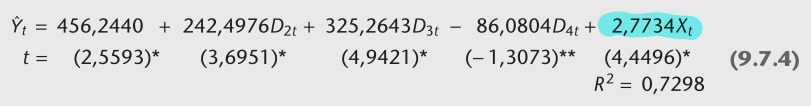

In [68]:
Image('./imagens/cap_09_exemplo_9.6_6.png')

## Exemplo 9.7 - Regressão Segmentada

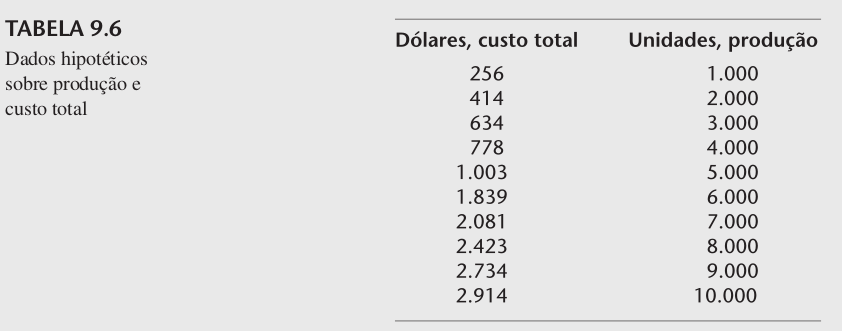

In [69]:
Image('./imagens/cap_09_tabela_9.6_1.png')

In [70]:
data = pd.read_excel('./datasets/tabela_9.6.xlsx')
data

custo  producao
0    256      1000
1    414      2000
2    634      3000
3    778      4000
4   1003      5000
5   1839      6000
6   2081      7000
7   2423      8000
8   2734      9000
9   2914     10000

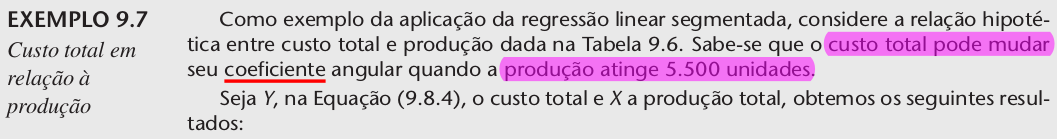

In [71]:
Image('./imagens/cap_09_exemplo_9.7_1.png')

In [72]:
# nó em 5500
data['d1'] = data['producao'].apply( lambda x: 0  if x < 5500 else 1 )
data['segmento'] = data.apply( lambda x: ( ( x['producao']- 5500 ) * x['d1'] ), axis = 1)
data

custo  producao  d1  segmento
0    256      1000   0         0
1    414      2000   0         0
2    634      3000   0         0
3    778      4000   0         0
4   1003      5000   0         0
5   1839      6000   1       500
6   2081      7000   1      1500
7   2423      8000   1      2500
8   2734      9000   1      3500
9   2914     10000   1      4500

In [73]:
fig = px.scatter_3d( data, x='producao', y='d1', z='custo', color = 'd1')
fig.show()

In [74]:
fig = px.scatter_3d( data, x='producao', y='segmento', z='custo', color = 'd1')
fig.show()

In [75]:
data['fixo'] = 0
data.head()

custo  producao  d1  segmento  fixo
0    256      1000   0         0     0
1    414      2000   0         0     0
2    634      3000   0         0     0
3    778      4000   0         0     0
4   1003      5000   0         0     0

In [76]:
fig = px.scatter_3d( data, x='producao', y='fixo', z='custo')
fig.show()

In [77]:
x = data[['producao', 'segmento']]
y = data['custo']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  custo   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     129.6
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           2.95e-06
Time:                        20:10:27   Log-Likelihood:                -64.588
No. Observations:                  10   AIC:                             135.2
Df Residuals:                       7   BIC:                             136.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -145.7167    176.734     -0.824      0.4

/home/deivison/Documentos/projetos/venv_jupyter3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



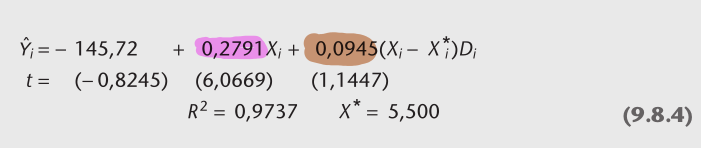

In [78]:
Image('./imagens/cap_09_exemplo_9.7_2.png')

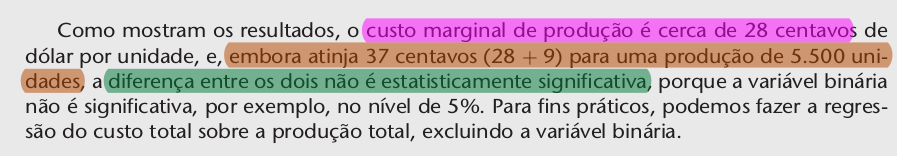

In [79]:
Image('./imagens/cap_09_exemplo_9.7_3.png')

In [80]:
data['predictions'] = predictions
data['desvio'] = model.resid

In [81]:
data

custo  producao  d1  segmento  fixo  predictions    desvio
0    256      1000   0         0     0     133.4091  122.5909
1    414      2000   0         0     0     412.5348    1.4652
2    634      3000   0         0     0     691.6606  -57.6606
3    778      4000   0         0     0     970.7864 -192.7864
4   1003      5000   0         0     0    1249.9121 -246.9121
5   1839      6000   1       500     0    1576.2879  262.7121
6   2081      7000   1      1500     0    1949.9136  131.0864
7   2423      8000   1      2500     0    2323.5394   99.4606
8   2734      9000   1      3500     0    2697.1652   36.8348
9   2914     10000   1      4500     0    3070.7909 -156.7909

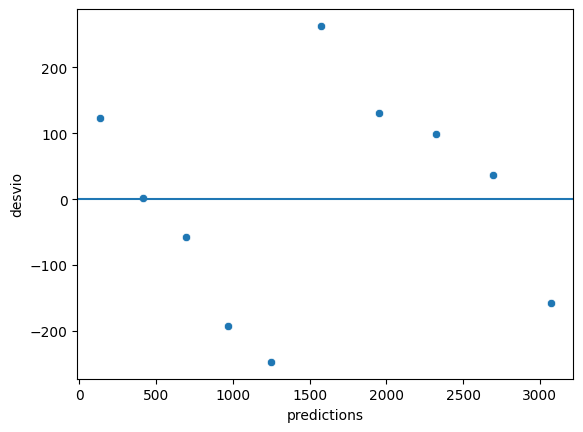

In [82]:
sns.scatterplot(data = data, y = 'desvio',x='predictions');
plt.axhline(y=0);